In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Reading the Data

In [27]:
big_mart_data = pd.read_csv('Train.csv')

Preliminary Data Analysis

In [28]:
big_mart_data.shape

(8523, 12)

In [29]:
big_mart_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


* Item_Identifier column can be dropped

### Handling Missing Values

In [30]:
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Columns - Item_Weight & Outlet_Size - have missing values

In [31]:
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Item_Weight

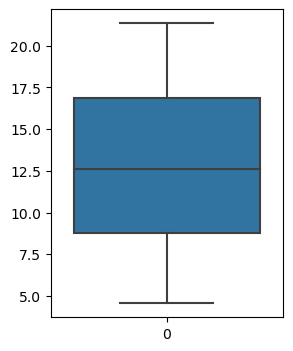

In [32]:
plt.figure(figsize=(3,4))
sns.boxplot(data=big_mart_data['Item_Weight'])
plt.show()

* The boxplot shows no outliers for Item_Weight, the missing values can be imputed with mean

Outlet_Size

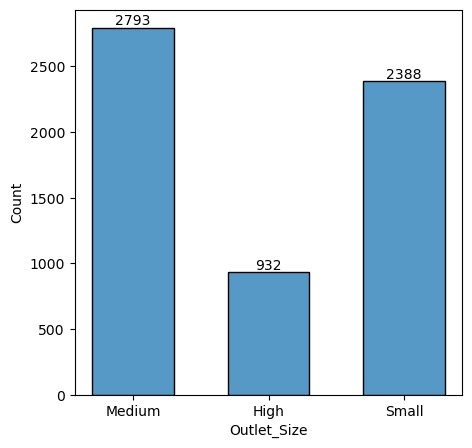

In [33]:
plt.figure(figsize=(5,5))
ax = sns.histplot(data=big_mart_data,x='Outlet_Size',shrink=0.6)
ax.bar_label(ax.containers[1])
plt.show()

In [34]:
big_mart_data['Outlet_Size'] = big_mart_data['Outlet_Size'].apply(lambda x: x if type(x)==str else 'Missing')

* nan values are mapped to 'Missing'

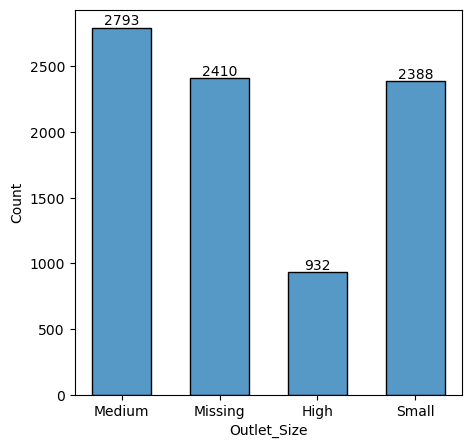

In [35]:
plt.figure(figsize=(5,5))
ax = sns.histplot(data=big_mart_data,x='Outlet_Size',shrink=0.6)
ax.bar_label(ax.containers[1])
plt.show()

In [36]:
tier = big_mart_data[['Outlet_Location_Type','Outlet_Type','Outlet_Size']].groupby(by=['Outlet_Location_Type','Outlet_Type'])

In [37]:
tier.value_counts()

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small           528
                      Supermarket Type1  Medium          930
                                         Small           930
Tier 2                Supermarket Type1  Missing        1855
                                         Small           930
Tier 3                Grocery Store      Missing         555
                      Supermarket Type1  High            932
                      Supermarket Type2  Medium          928
                      Supermarket Type3  Medium          935
dtype: int64

In [38]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [39]:
outlet_location_type = sorted(big_mart_data['Outlet_Location_Type'].unique())

In [40]:
outlet_location_type

['Tier 1', 'Tier 2', 'Tier 3']

In [41]:
outlet_type = sorted(big_mart_data['Outlet_Type'].unique())

In [42]:
outlet_type

['Grocery Store',
 'Supermarket Type1',
 'Supermarket Type2',
 'Supermarket Type3']

In [43]:
outlet_size = sorted([size for size in big_mart_data['Outlet_Size'].unique() if type(size) == str])

In [44]:
outlet_size

['High', 'Medium', 'Missing', 'Small']

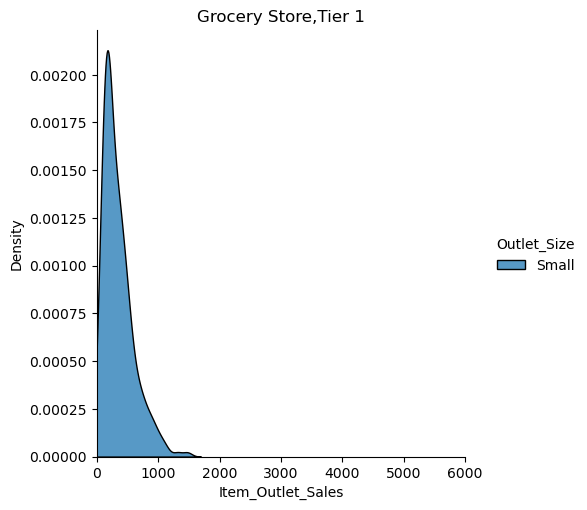

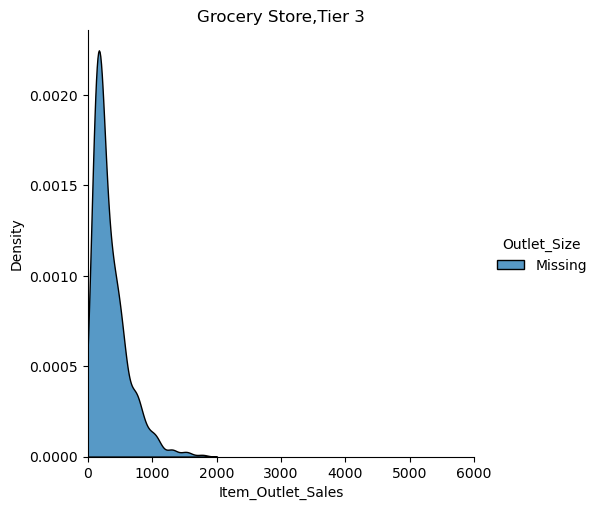

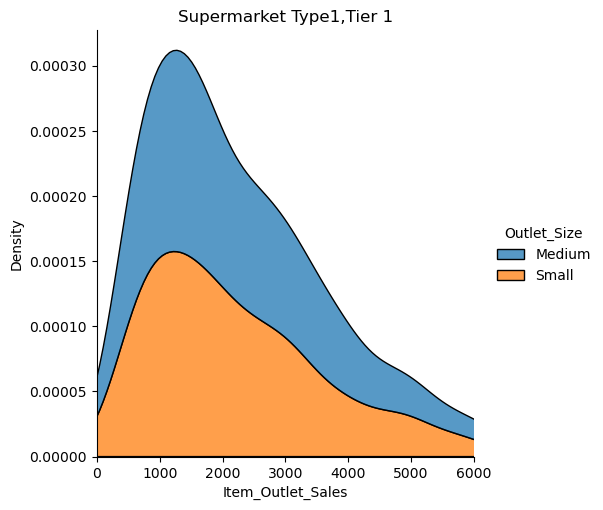

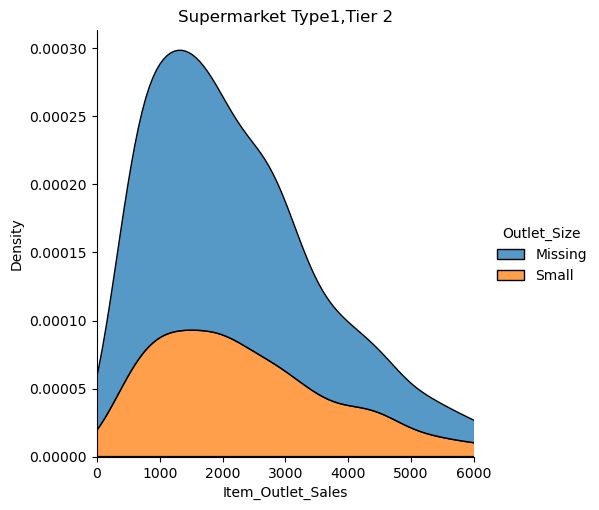

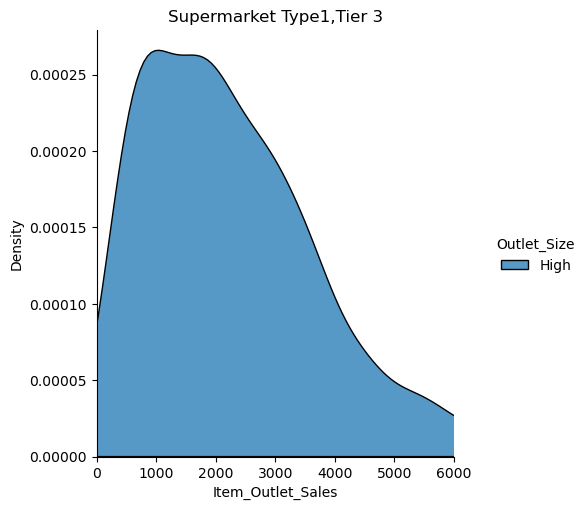

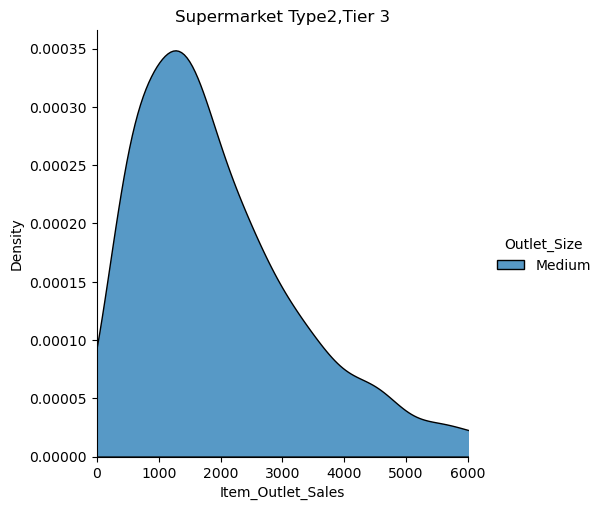

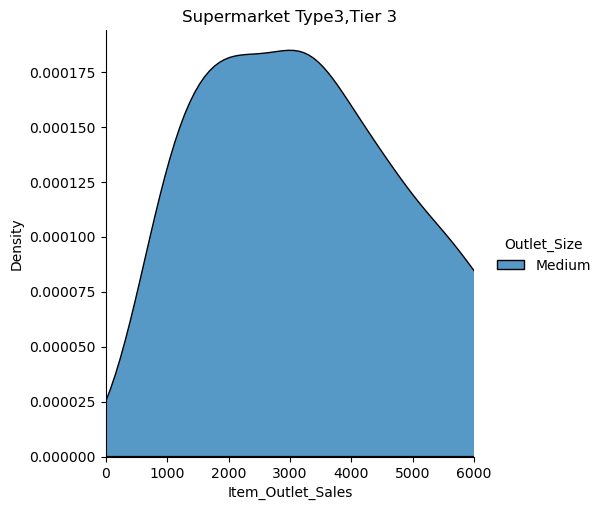

In [48]:
for i in outlet_type:
    for j in outlet_location_type:
        df = big_mart_data[(big_mart_data['Outlet_Type']==i) & (big_mart_data['Outlet_Location_Type']==j)]
        if not df.empty:
            sns.displot(data=df,x='Item_Outlet_Sales',hue='Outlet_Size',multiple='stack',kind='kde').set(title=f"{i},{j}",xlim=(0,6000))

* Outlet_Type and Outlet_Location_Type, with Item_Outlet_Sales can be used to deduct the missing Outlet_Size values
* Can Outlet_Size be dropped ?
* Outlet_Identifier can be dropped. If not, give that as the only input and keep all other options in backend

In [63]:
len(big_mart_data['Outlet_Identifier'].unique())

10

In [54]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [61]:
df = big_mart_data[['Outlet_Establishment_Year','Outlet_Location_Type','Outlet_Type','Outlet_Identifier']]
df.groupby(['Outlet_Establishment_Year','Outlet_Location_Type','Outlet_Type','Outlet_Identifier']).size().reset_index().rename(columns={0:'Count'})

,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Outlet_Identifier,Count
0,1985,Tier 1,Grocery Store,OUT019,528
1,1985,Tier 3,Supermarket Type3,OUT027,935
2,1987,Tier 3,Supermarket Type1,OUT013,932
3,1997,Tier 1,Supermarket Type1,OUT046,930
4,1998,Tier 3,Grocery Store,OUT010,555
5,1999,Tier 1,Supermarket Type1,OUT049,930
6,2002,Tier 2,Supermarket Type1,OUT045,929
7,2004,Tier 2,Supermarket Type1,OUT035,930
8,2007,Tier 2,Supermarket Type1,OUT017,926
9,2009,Tier 3,Supermarket Type2,OUT018,928


In [72]:
outlets = big_mart_data['Outlet_Identifier'].unique()
outlets

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

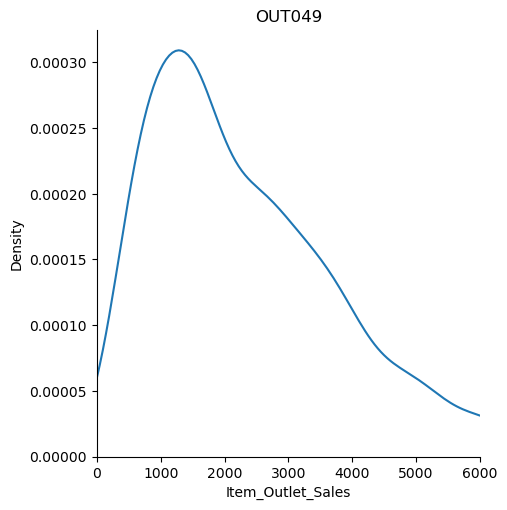

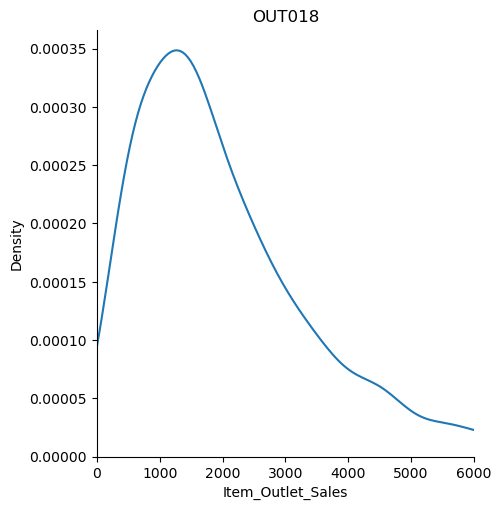

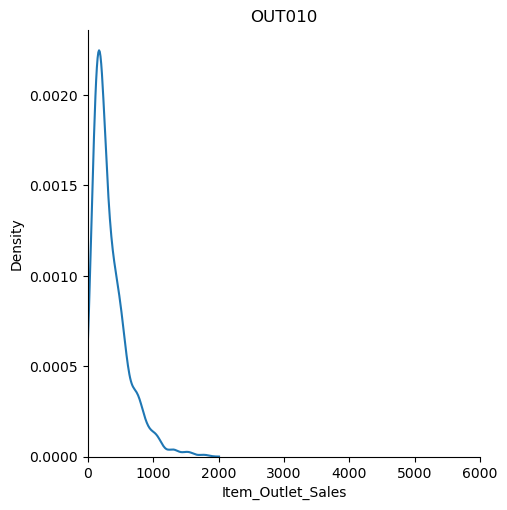

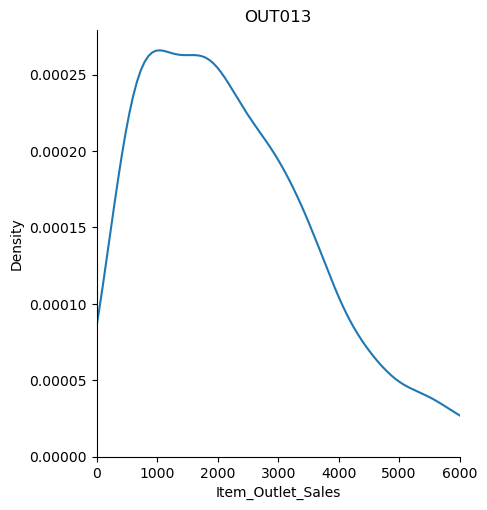

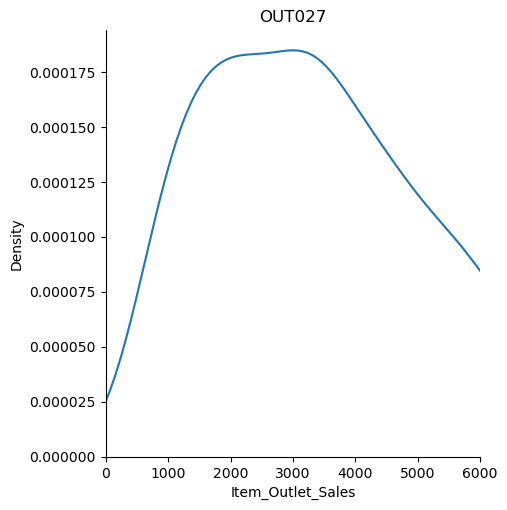

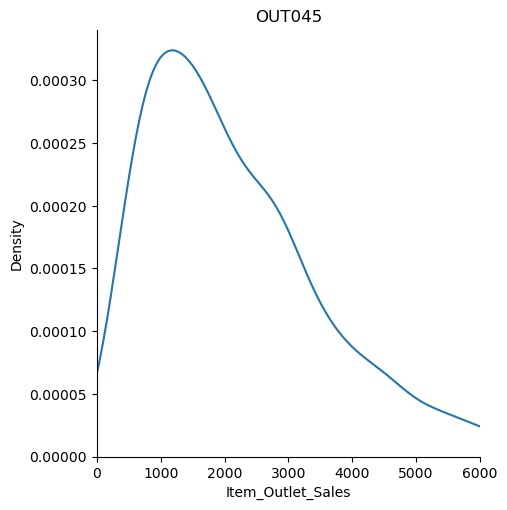

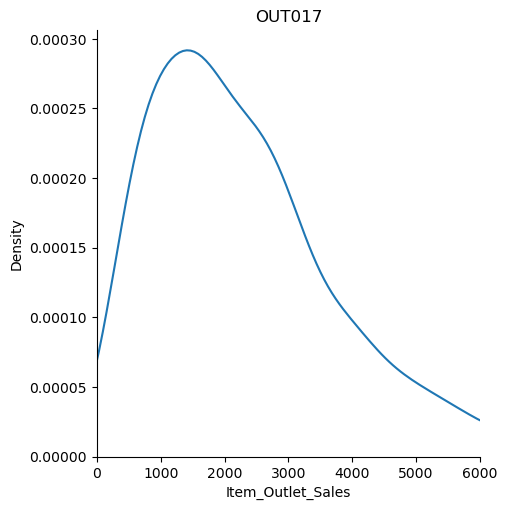

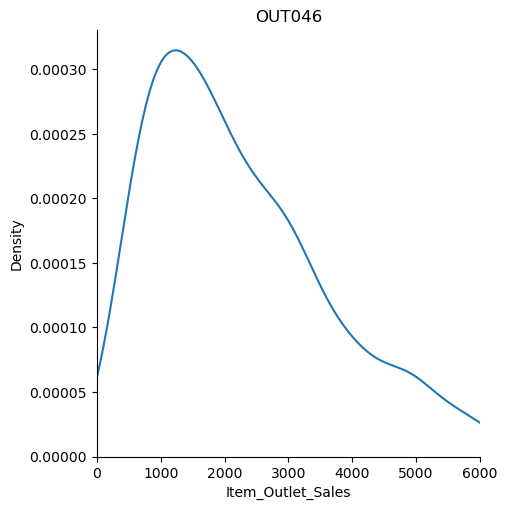

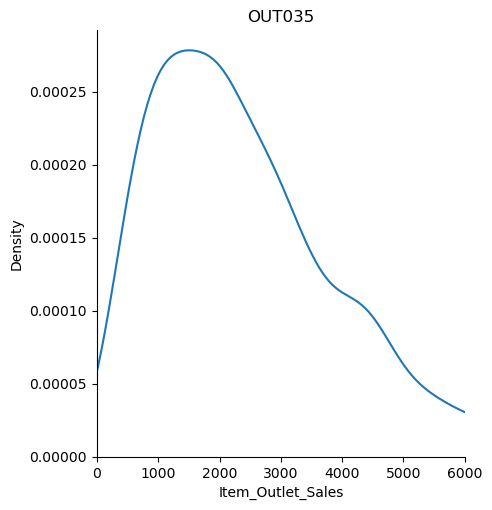

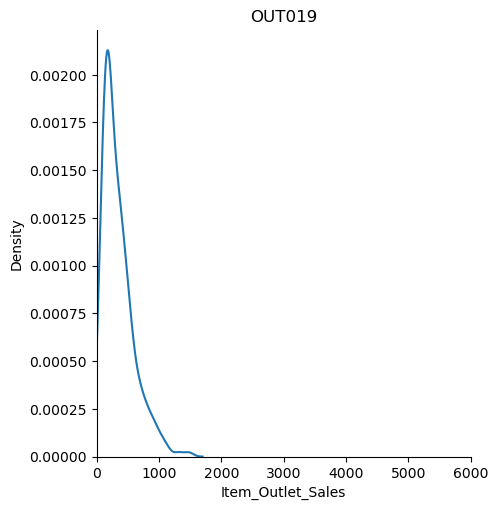

In [79]:
for outlet in outlets:
    df = big_mart_data[big_mart_data['Outlet_Identifier']==outlet]
    sns.displot(data=df,x='Item_Outlet_Sales',kind='kde').set(title=f"{outlet}",xlim=(0,6000))

In [86]:
outlet_df = big_mart_data[['Outlet_Identifier','Outlet_Establishment_Year']].groupby(['Outlet_Identifier','Outlet_Establishment_Year']).size().reset_index().drop(columns=[0])
outlet_df

,Outlet_Identifier,Outlet_Establishment_Year
0,OUT010,1998
1,OUT013,1987
2,OUT017,2007
3,OUT018,2009
4,OUT019,1985
5,OUT027,1985
6,OUT035,2004
7,OUT045,2002
8,OUT046,1997
9,OUT049,1999


In [93]:
outlets = zip(list(outlet_df.Outlet_Identifier),list(outlet_df.Outlet_Establishment_Year))
outlets = sorted(list(outlets),key=lambda tup:tup[1])
outlets

[('OUT019', 1985),
 ('OUT027', 1985),
 ('OUT013', 1987),
 ('OUT046', 1997),
 ('OUT010', 1998),
 ('OUT049', 1999),
 ('OUT045', 2002),
 ('OUT035', 2004),
 ('OUT017', 2007),
 ('OUT018', 2009)]

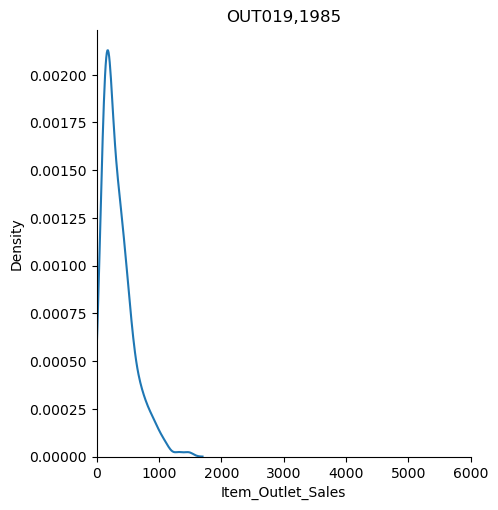

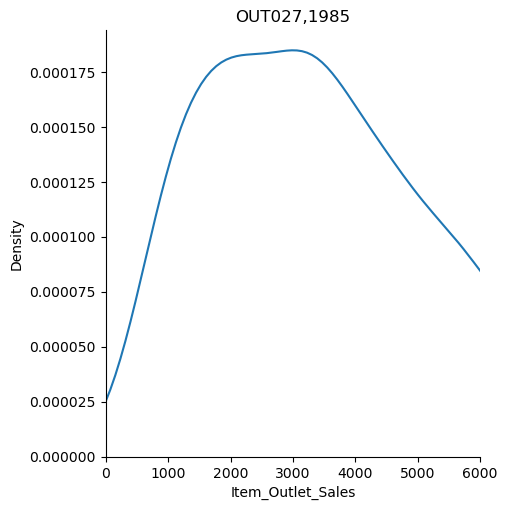

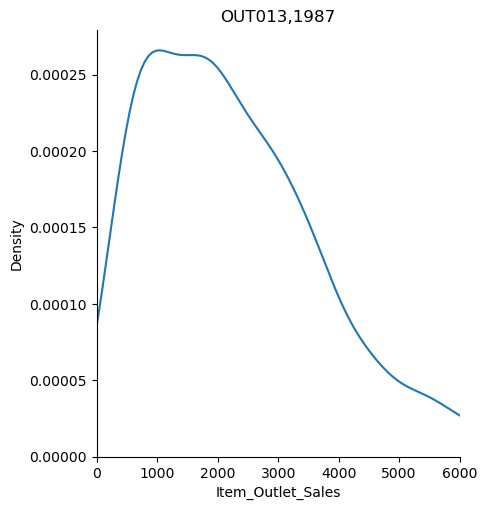

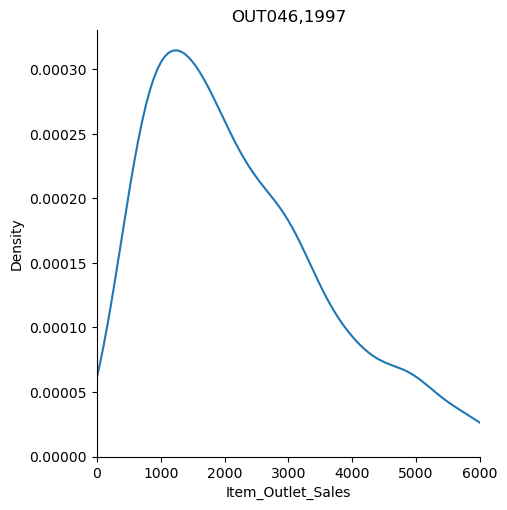

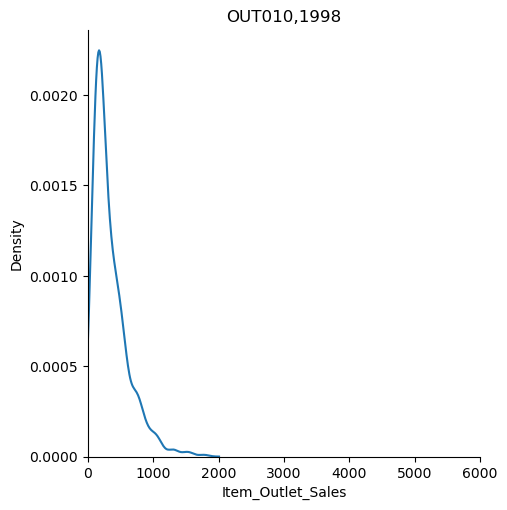

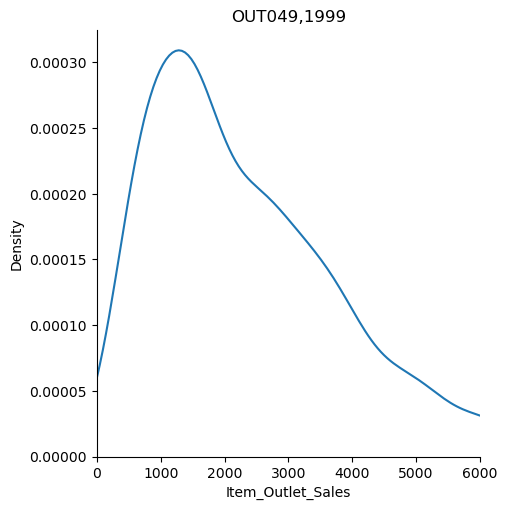

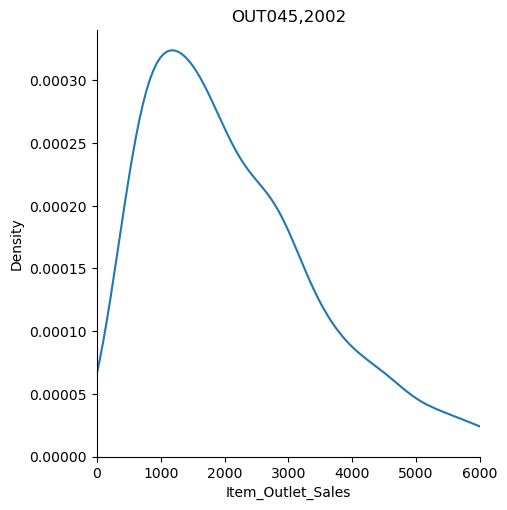

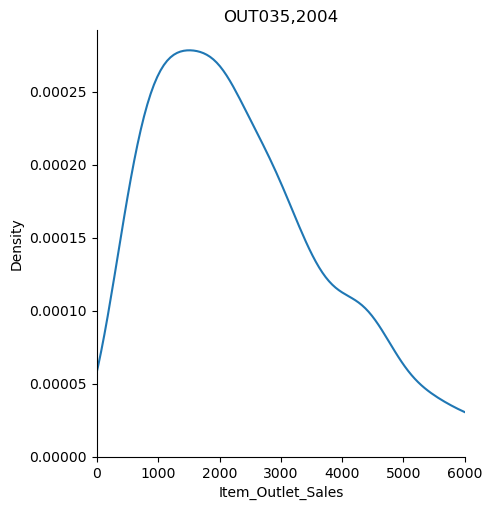

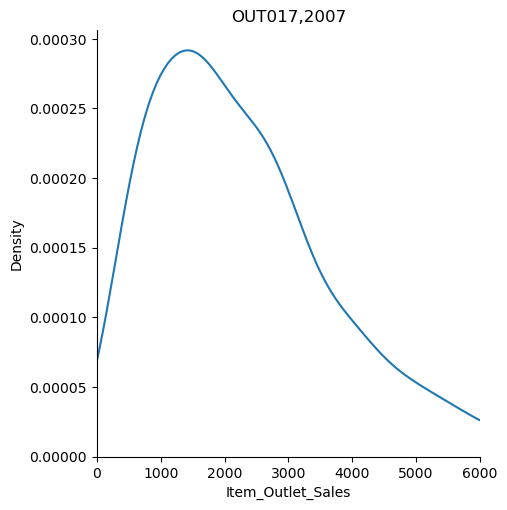

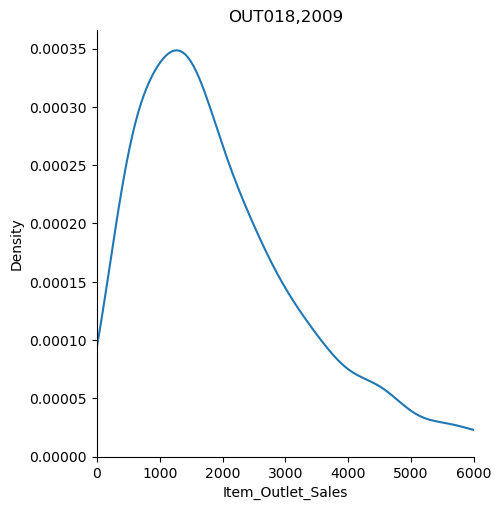

In [94]:
for outlet,year in outlets:
    df = big_mart_data[big_mart_data['Outlet_Identifier']==outlet]
    sns.displot(data=df,x='Item_Outlet_Sales',kind='kde').set(title=f"{outlet},{year}",xlim=(0,6000))

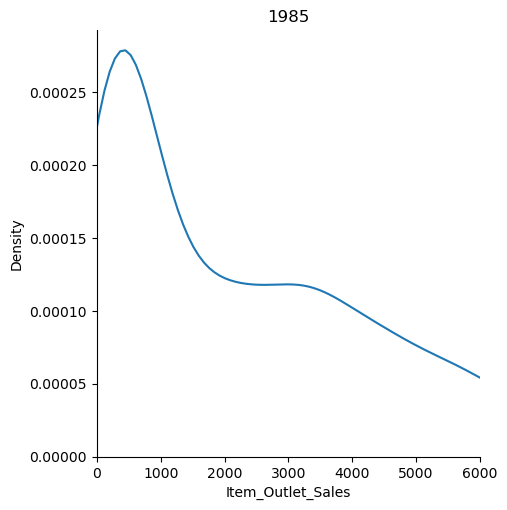

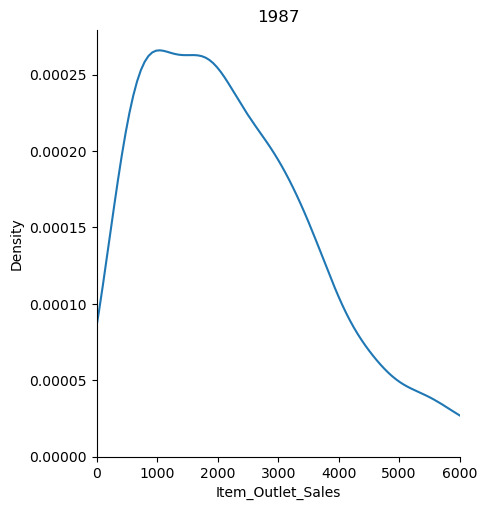

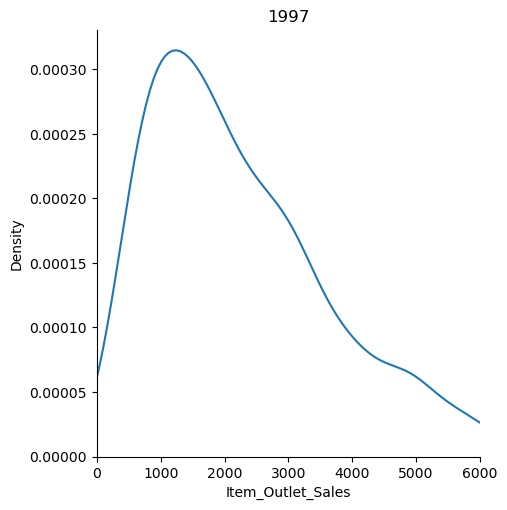

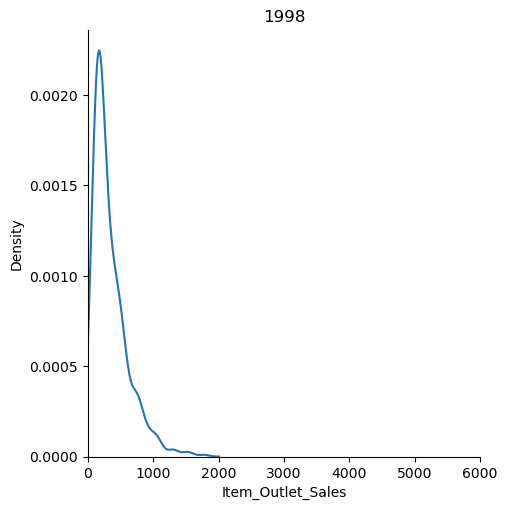

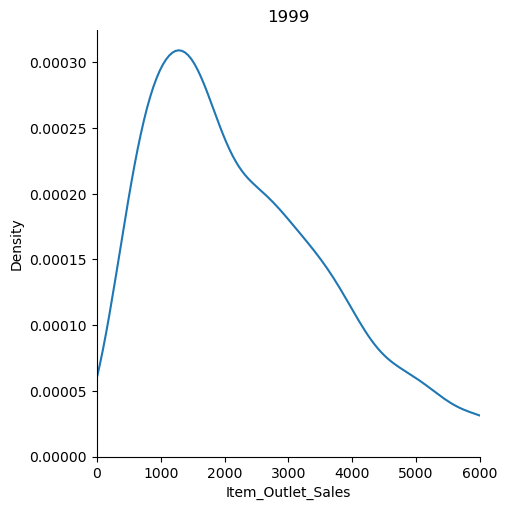

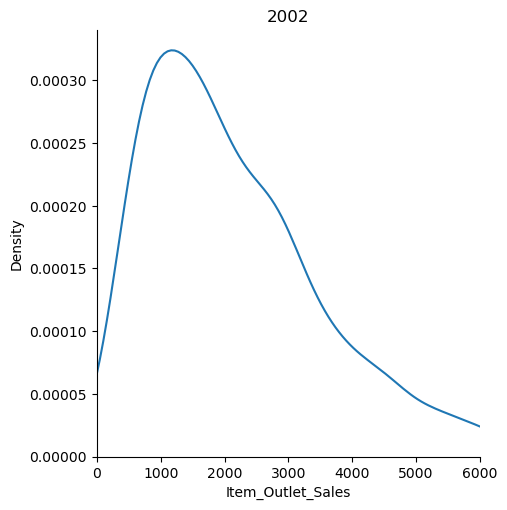

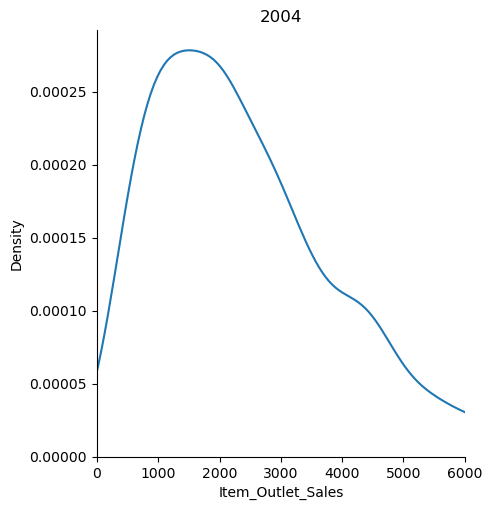

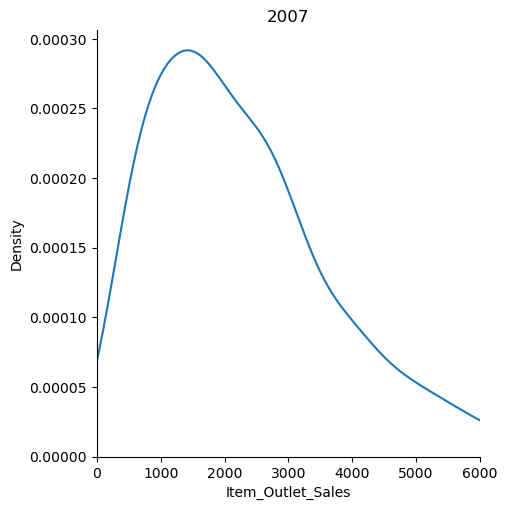

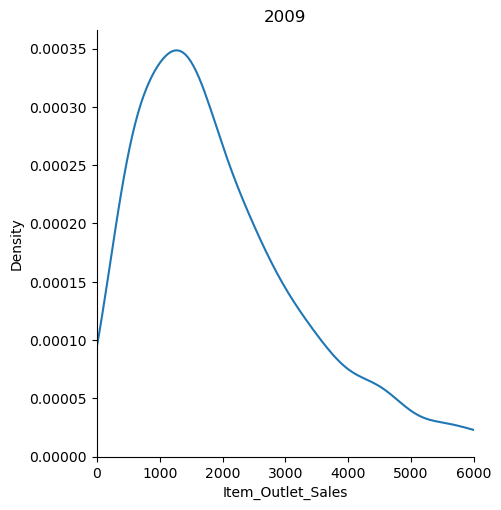

In [96]:
for year in sorted(outlet_df.Outlet_Establishment_Year.unique()):
    df = big_mart_data[big_mart_data['Outlet_Establishment_Year']==year]
    sns.displot(data=df,x='Item_Outlet_Sales',kind='kde').set(title=f"{year}",xlim=(0,6000))

* The older the store does not imply more sales
* Outlet_Establishment_Year can be dropped

In [98]:
big_mart_data.drop(columns=['Outlet_Establishment_Year'],inplace=True)

In [99]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052


In [118]:
outlet_details = big_mart_data[['Outlet_Identifier','Outlet_Type','Outlet_Location_Type']].groupby(['Outlet_Identifier','Outlet_Type','Outlet_Location_Type']).size().reset_index().drop(columns=[0])
outlet_details

,Outlet_Identifier,Outlet_Type,Outlet_Location_Type
0,OUT010,Grocery Store,Tier 3
1,OUT013,Supermarket Type1,Tier 3
2,OUT017,Supermarket Type1,Tier 2
3,OUT018,Supermarket Type2,Tier 3
4,OUT019,Grocery Store,Tier 1
5,OUT027,Supermarket Type3,Tier 3
6,OUT035,Supermarket Type1,Tier 2
7,OUT045,Supermarket Type1,Tier 2
8,OUT046,Supermarket Type1,Tier 1
9,OUT049,Supermarket Type1,Tier 1


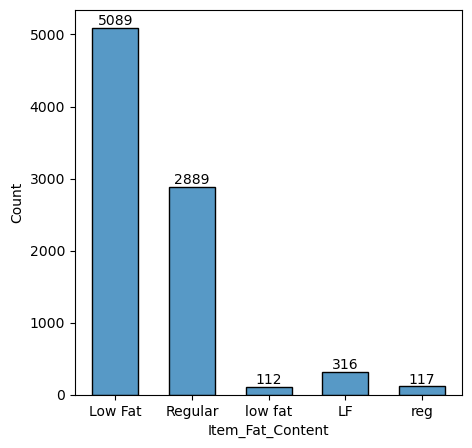

In [101]:
plt.figure(figsize=(5,5))
ax = sns.histplot(data=big_mart_data,x='Item_Fat_Content',shrink=0.6)
ax.bar_label(ax.containers[1])
plt.show()

In [103]:
big_mart_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [105]:
big_mart_data['Item_Fat_Content'] = big_mart_data['Item_Fat_Content'].apply(lambda x:'Low Fat' if x in ['Low Fat','low fat','LF'] else 'Regular')

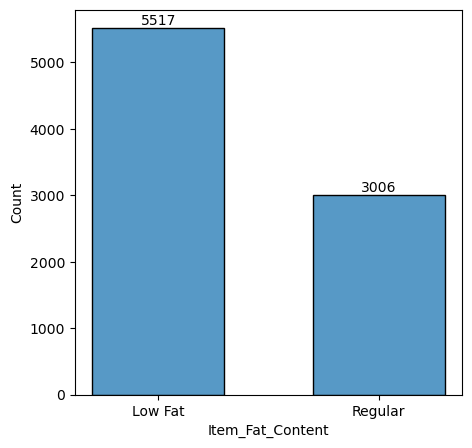

In [106]:
plt.figure(figsize=(5,5))
ax = sns.histplot(data=big_mart_data,x='Item_Fat_Content',shrink=0.6)
ax.bar_label(ax.containers[1])
plt.show()

* OneHotEncode Item_Fat_Content and Item_Type

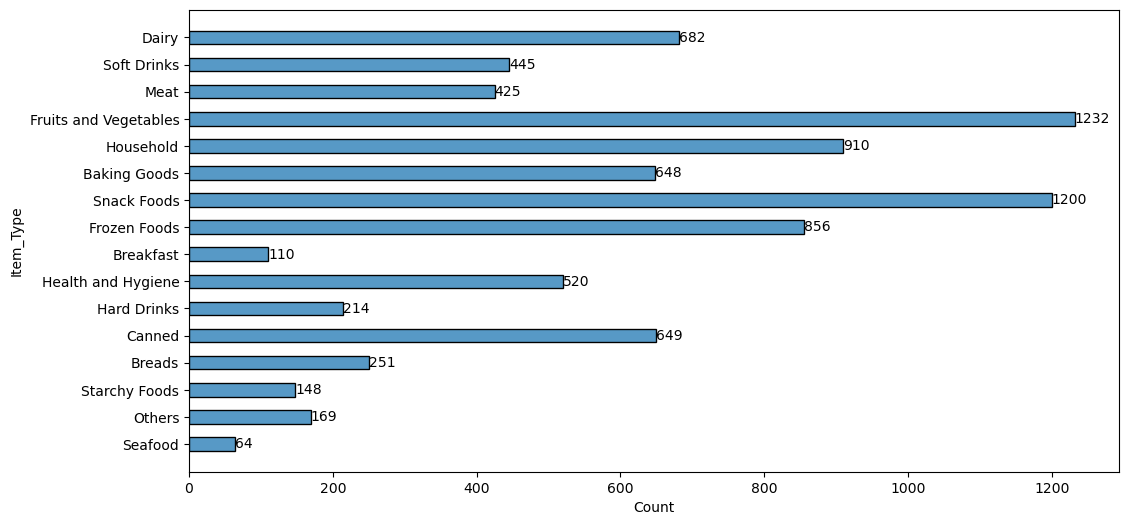

In [117]:
plt.figure(figsize=(12,6))
ax = sns.histplot(data=big_mart_data,y='Item_Type',shrink=0.5)
ax.bar_label(ax.containers[1])
plt.show()

In [122]:
big_mart_data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64